# Feature engineering demonstration

---
## Load data from CSV

Let's check the directory for our data file

In [38]:
!ls

 deutsche-boerse-xetra-pds_2017-10-16.csv   LICENSE
 deutsche-boerse-xetra-pds_week39.csv	    README.md
 environment.yml			    Untitled.ipynb
'Feature Engineering Demonstration.ipynb'


Import our Python libraries for data exploration and feature engineering

In [39]:
# Introduce imports which we will use next
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

Read data into a Pandas DataFrame from our CSV

In [40]:
df = pd.read_csv ('deutsche-boerse-xetra-pds_week39.csv')

---
## Explore the data

### What does the data structure look like?

In [41]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323942 entries, 0 to 323941
Data columns (total 14 columns):
ISIN              323942 non-null object
Mnemonic          323942 non-null object
SecurityDesc      323942 non-null object
SecurityType      323942 non-null object
Currency          323942 non-null object
SecurityID        323942 non-null int64
Date              323942 non-null object
Time              323942 non-null object
StartPrice        323942 non-null float64
MaxPrice          323942 non-null float64
MinPrice          323942 non-null float64
EndPrice          323942 non-null float64
TradedVolume      323942 non-null int64
NumberOfTrades    323942 non-null int64
dtypes: float64(4), int64(3), object(7)
memory usage: 34.6+ MB


### What does the data look like?  Lets see a sample

In [42]:
df.sample (5)

,ISIN,Mnemonic,SecurityDesc,SecurityType,Currency,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades
193053,DE000SHA0159,SHA,SCHAEFFLER AG INH. VZO,Common stock,EUR,2504849,2017-10-19,10:29,13.635,13.635,13.635,13.635,440,1
158400,DE0005200000,BEI,BEIERSDORF AG O.N.,Common stock,EUR,2504906,2017-10-18,07:42,93.950,93.950,93.950,93.950,173,2
67338,DE0007568578,F3C,SFC ENERGY AG,Common stock,EUR,2505109,2017-10-17,14:26,6.200,6.200,6.200,6.200,385,2
313886,DE000ETFL045,EL4D,DK STOXX EUR.STR.VALUE 20,ETF,EUR,2504684,2017-10-20,15:25,21.540,21.540,21.540,21.540,400,1
160263,GB0007980591,BPE5,"BP PLC DL-,25",Common stock,EUR,2505380,2017-10-18,07:57,5.490,5.490,5.490,5.490,200,1


### How diverse are fields like ISIN and Mnemonic?

In [44]:
len(df.ISIN.unique())

1840

In [45]:
len(df.Mnemonic.unique())

1848

### How many trade records do we have per mnemonic?

In [52]:
series = df.groupby(df.Mnemonic).Mnemonic.count()
series.sort_values (ascending=False)[:50]

Mnemonic
DAI     2511
BAS     2501
SAP     2484
BMW     2464
DBK     2457
TKA     2435
LHA     2422
FRE     2380
IFX     2371
CBK     2347
ALV     2340
DPW     2336
DTE     2335
RWE     2334
DB1     2325
VOW3    2319
BEI     2316
EOAN    2306
HEI     2296
KGX     2286
PAH3    2254
VNA     2253
MRK     2244
PSM     2242
FME     2209
SIE     2199
WDI     2195
BAYN    2195
CON     2188
LIN     2178
ADS     2173
MUV2    2136
OSR     2062
ZAL     2052
UN01    1999
G1A     1959
BNR     1842
ADE     1823
DWNI    1822
EVT     1820
1COV    1798
SDF     1773
IGY     1760
DLG     1755
SZG     1743
WAF     1737
LXS     1735
HEN3    1713
SZU     1695
BOSS    1691
Name: Mnemonic, dtype: int64

### Now as a graph?

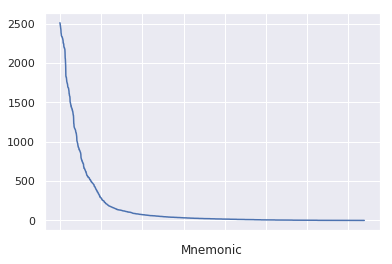

In [50]:
series.sort_values(ascending=False).plot(kind='line')

### What about the other fields?

In [53]:
len(df.SecurityDesc.unique())

1771

In [54]:
df.SecurityType.unique()

array(['ETF', 'Common stock', 'ETC', 'Other', 'ETN'], dtype=object)

### Whats the distribution like for records by security type?

In [55]:
df.SecurityType.value_counts ()

Common stock    286933
ETF              33960
ETC               2170
Other              745
ETN                134
Name: SecurityType, dtype: int64

### And now currency?

In [56]:
df.Currency.unique()

array(['EUR', 'USD'], dtype=object)

In [57]:
df.Currency.value_counts()

EUR    323919
USD        23
Name: Currency, dtype: int64

### Next, security ID

In [58]:
len(df.SecurityID.unique())

1840

That looks a lot like the size of ISIN, they are likely logically equivalent

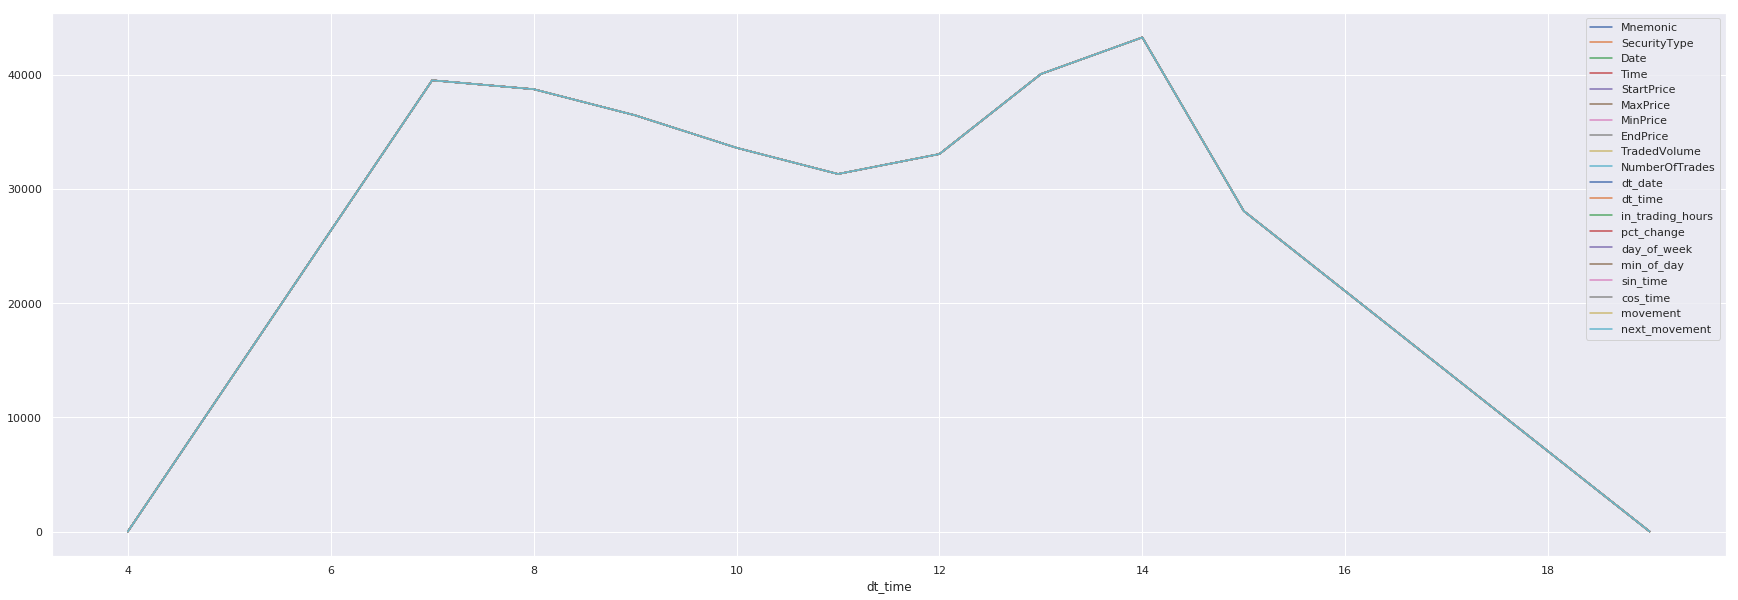

In [34]:
df.groupby(df.dt_time.dt.hour).count().plot(kind='line', figsize=(30,10))

---
## Clean the data 

### Right now date and time are strings, lets convert them to a date / time format

In [60]:
df['dt_date'] = df.Date.astype(np.datetime64)

In [61]:
df['dt_time'] = (df.Date +' '+ df.Time).astype(np.datetime64)

### How many trades are conducted over time?

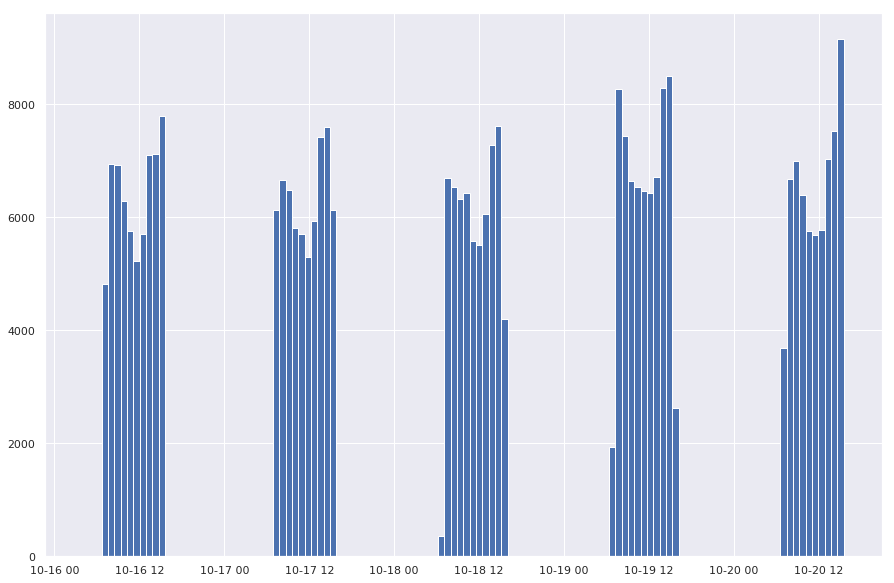

In [62]:
df.dt_time.hist (bins=5*24, figsize=(15,10))

### On average how many trades are carried out over a day?

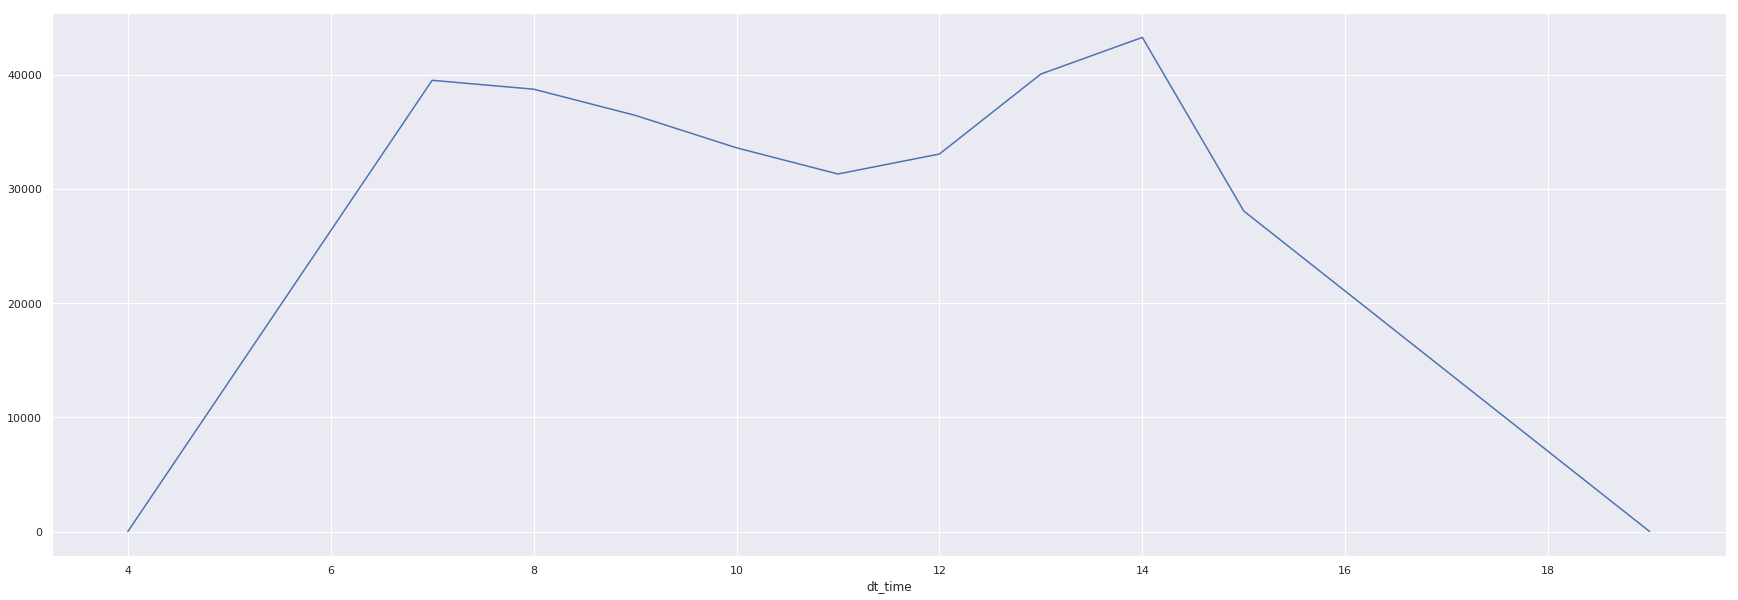

In [63]:
df.groupby(df.dt_time.dt.hour).dt_time.count().plot(kind='line', figsize=(30,10))

### Security type had 5 potential values, lets convert that from a string to a category

In [64]:
df.SecurityType = df.SecurityType.astype('category')

### Currency was not statistically significant and Security ID, description, and ISIN can be represented  by Mnemonic so lets drop them

In [65]:
df.drop(columns=['Currency', 'SecurityID','ISIN','SecurityDesc'], inplace=True)

### Lets quickly summarize our data set as it stands

In [66]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323942 entries, 0 to 323941
Data columns (total 12 columns):
Mnemonic          323942 non-null object
SecurityType      323942 non-null category
Date              323942 non-null object
Time              323942 non-null object
StartPrice        323942 non-null float64
MaxPrice          323942 non-null float64
MinPrice          323942 non-null float64
EndPrice          323942 non-null float64
TradedVolume      323942 non-null int64
NumberOfTrades    323942 non-null int64
dt_date           323942 non-null datetime64[ns]
dt_time           323942 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(4), int64(2), object(3)
memory usage: 27.5+ MB


In [67]:
df.sample(5)

,Mnemonic,SecurityType,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,dt_date,dt_time
44820,HYQ,Common stock,2017-10-16,15:11,159.05,159.10,159.00,159.00,162,7,2017-10-16,2017-10-16 15:11:00
78077,CON,Common stock,2017-10-17,12:02,214.75,214.75,214.75,214.75,90,1,2017-10-17,2017-10-17 12:02:00
242448,FIE,Common stock,2017-10-19,14:55,73.06,73.06,73.06,73.06,80,1,2017-10-19,2017-10-19 14:55:00
41514,QIA,Common stock,2017-10-16,14:48,29.53,29.53,29.53,29.53,303,4,2017-10-16,2017-10-16 14:48:00
206965,DBXD,ETF,2017-10-19,07:23,126.91,126.91,126.91,126.91,210,1,2017-10-19,2017-10-19 07:23:00


---
## Engineer a feature set

### Let's create an indicator variable to mark whether the trade was during opening hours

In [68]:
df['in_trading_hours'] = 0
df.loc[(df.dt_time.dt.hour > 8) & (df.dt_time.dt.hour <= 20), 'in_trading_hours'] = 1

### Now create an interaction feature, calculating the percentage price change

In [69]:
df['pct_change'] = (df.EndPrice - df.StartPrice)/df.StartPrice

### Let's represent different aspects of the timestamp with feature representation

Let's mark what day of the week it is

In [70]:
df['day_of_week'] = df.dt_date.dt.weekday

How far into the day it is (in minutes)

In [71]:
df['min_of_day'] = df.dt_time.dt.hour*60 + df.dt_time.dt.minute

### Time of day is a continuous value, lets represent it using geometry

In [72]:
minutes_in_day = 24*60

df['sin_time'] = np.sin(2*np.pi*df.min_of_day/minutes_in_day)
df['cos_time'] = np.cos(2*np.pi*df.min_of_day/minutes_in_day)

### Finally we need a target variable, something to predict - a label

Let's aim to predict whether the price rises, falls, or stays the same in the next trade

In [73]:
df['movement'] = 0
df.loc[(df['pct_change'] > 0), 'movement'] = 1
df.loc[(df['pct_change'] < 0), 'movement'] = -1
df['next_movement'] = 0
df['next_movement'] = df.movement.shift (-1)

## Explore the engineered data set

### Let's sample our engineered data set

In [74]:
df.sample (5)

,Mnemonic,SecurityType,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,dt_date,dt_time,in_trading_hours,pct_change,day_of_week,min_of_day,sin_time,cos_time,movement,next_movement
70741,SPYD,ETF,2017-10-17,14:49,42.570,42.570,42.560,42.570,250,2,2017-10-17,2017-10-17 14:49:00,1,0.000000,1,889,-0.672367,-0.740218,0,0.0
30385,SIX2,Common stock,2017-10-16,10:19,69.380,69.380,69.280,69.280,402,5,2017-10-16,2017-10-16 10:19:00,1,-0.001441,0,619,0.426569,-0.904455,-1,0.0
46394,ZFIN,Common stock,2017-10-16,15:20,255.300,255.300,255.300,255.300,16,4,2017-10-16,2017-10-16 15:20:00,1,0.000000,0,920,-0.766044,-0.642788,0,0.0
63507,1COV,Common stock,2017-10-16,08:58,72.500,72.500,72.490,72.490,308,3,2017-10-16,2017-10-16 08:58:00,0,-0.000138,0,538,0.713250,-0.700909,-1,0.0
267593,MLP,Common stock,2017-10-20,09:04,5.917,5.917,5.917,5.917,61,1,2017-10-20,2017-10-20 09:04:00,1,0.000000,4,544,0.694658,-0.719340,0,-1.0


### What's the distribution of our target variable, do we have a good number of all 3 classes?

In [75]:
df.next_movement.value_counts()

 0.0    186381
-1.0     69824
 1.0     67736
Name: next_movement, dtype: int64

Slightly skewed, but not bad

### How well do our current features correlate with the next stock movement?

In [76]:
df.corr()[['next_movement']]

,next_movement
StartPrice,0.000433
MaxPrice,0.000437
MinPrice,0.000440
EndPrice,0.000444
TradedVolume,-0.001360
NumberOfTrades,0.000666
in_trading_hours,0.008522
pct_change,0.010498
day_of_week,-0.003230
min_of_day,0.005476


### And what is the correlation of all fields with all others?

In [78]:
pd.options.display.max_columns = 35
df.corr ()

,StartPrice,MaxPrice,MinPrice,EndPrice,TradedVolume,NumberOfTrades,in_trading_hours,pct_change,day_of_week,min_of_day,sin_time,cos_time,movement,next_movement
StartPrice,1.000000,1.000000,0.999999,0.999999,-0.088841,0.005808,-0.002048,0.001392,0.000455,-0.001811,0.001384,-0.002420,0.000100,0.000433
MaxPrice,1.000000,1.000000,0.999999,1.000000,-0.088822,0.005983,-0.002084,0.001631,0.000468,-0.001834,0.001403,-0.002377,0.000280,0.000437
MinPrice,0.999999,0.999999,1.000000,1.000000,-0.088864,0.005601,-0.002008,0.001768,0.000440,-0.001784,0.001360,-0.002468,0.000300,0.000440
EndPrice,0.999999,1.000000,1.000000,1.000000,-0.088844,0.005787,-0.002043,0.001976,0.000453,-0.001806,0.001379,-0.002425,0.000465,0.000444
TradedVolume,-0.088841,-0.088822,-0.088864,-0.088844,1.000000,0.345626,-0.029025,-0.021525,0.017288,-0.017295,0.014958,0.038552,-0.003111,-0.001360
NumberOfTrades,0.005808,0.005983,0.005601,0.005787,0.345626,1.000000,-0.067097,-0.030841,0.054896,-0.034875,0.028009,0.096449,-0.008283,0.000666
in_trading_hours,-0.002048,-0.002084,-0.002008,-0.002043,-0.029025,-0.067097,1.000000,0.003549,0.003329,0.743416,-0.708021,-0.806757,0.008511,0.008522
pct_change,0.001392,0.001631,0.001768,0.001976,-0.021525,-0.030841,0.003549,1.000000,-0.002443,0.003106,-0.002627,-0.003353,0.424142,0.010498
day_of_week,0.000455,0.000468,0.000440,0.000453,0.017288,0.054896,0.003329,-0.002443,1.000000,0.002365,-0.002150,-0.007327,-0.003226,-0.003230
min_of_day,-0.001811,-0.001834,-0.001784,-0.001806,-0.017295,-0.034875,0.743416,0.003106,0.002365,1.000000,-0.996917,-0.514232,0.005451,0.005476


### Make it pretty

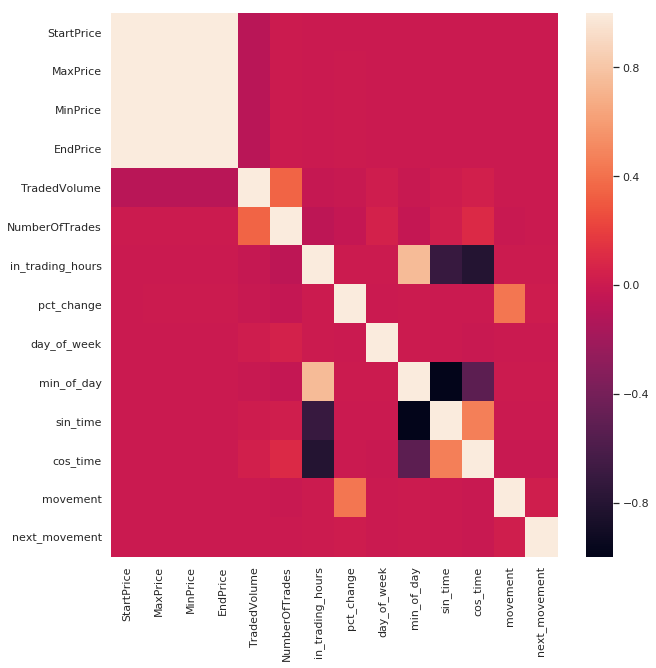

In [91]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax)

---
## Quick test using sklearn

### Lets quickly train a GBM on our data and see how it performs

Using SciKit Learn, lets train a gradient boosted model to classifier our trade events and try to predict movement.

First create a classifier...

In [92]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=20, subsample=0.3, max_depth=12, verbose=1)

Next split our data set into training data and test data, keep the labels separate from the features.

In [93]:
from sklearn.model_selection import train_test_split

data_X = pd.get_dummies(df.drop(columns=['Mnemonic', 'Date', 'Time', 'dt_date', 'dt_time', 'next_movement'], axis = 1)) 
data_Y = df.next_movement
data_Y.fillna(0, inplace=True)
train_X, test_X, train_Y, test_Y = train_test_split (data_X, data_Y, test_size=0.2)

sample_weights = np.ones(train_X.shape[0])

Next fit the model, train it on the training data

In [95]:
gbc.fit(train_X.values, train_Y.values, sample_weight=sample_weights)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1       77700.8147        2682.2483           10.61m
         2       76575.1658        2136.9760           10.43m
         3       75602.1123        1703.9269           10.33m
         4       74795.7857        1396.4559            9.74m
         5       73977.8271        1169.7251            8.96m
         6       73595.1991         888.2815            8.17m
         7       73029.5027         763.4860            7.44m
         8       72511.6785         583.5769            6.94m
         9       72123.4630         525.9162            6.28m
        10       71620.3676         377.6864            5.65m
        20       69530.2653          19.7887            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=12,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=20,
              presort='auto', random_state=None, subsample=0.3, verbose=1,
              warm_start=False)

### Training is complete, how accurate is it?

In [96]:
pred = gbc.predict(test_X)

In [99]:
from sklearn.metrics import accuracy_score
accuracy_score (test_Y, pred)

0.57820000308694375

Not bad, slightly better than guessing!

Lets ensure we haven't overfit, lets test on the original training data...

In [100]:
train_pred = gbc.predict(train_X)
accuracy_score (train_Y, train_pred)

0.5940892059902837

We don't appear to have memorized the training set so that's good but accuracy could probably be improved.  What refinement do you think we could make to the training data to increase our accuracy?

---

If we wanted to see a breakdown of how the model has misclassified observations we can use a confusion matrix.

In [97]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(test_Y, pred)
cfm

array([[  317, 13266,   292],
       [  319, 36828,   248],
       [  272, 12931,   316]])

Now visually paint the confusion matrix in color...

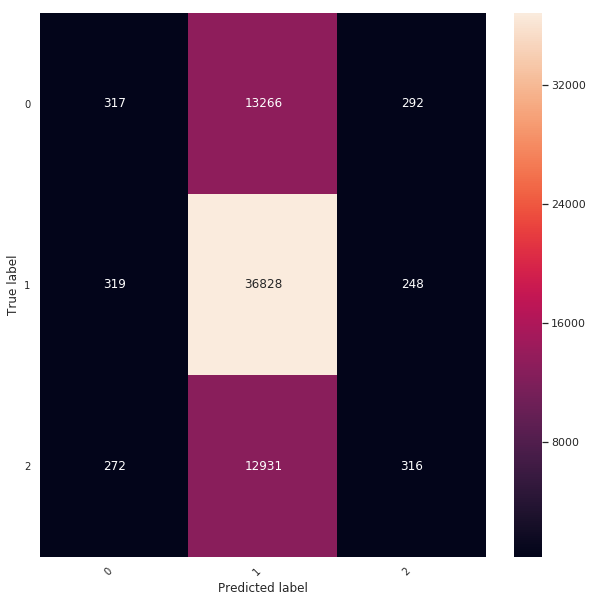

In [98]:
fig = plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cfm, annot=True, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()